### 100,000 UK Used Car Data set\n
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes
1. Выбрать набор данных для своей группы: <br>
3530203_70101: Audi <br>
3530203_70102: BMW <br>
3530903_70301: Ford <br>
3530903_70302: Mercedes<br>
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [2]:
auto_data = pd.read_csv("bmw.csv")
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [13]:
Y = auto_data['price']
X = auto_data.drop(['price'], axis=1)
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...
10776,X3,2016,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,Automatic,45000,Diesel,30,64.2,2.0


In [4]:
model_encoder = LabelEncoder()
transmission_encoder = LabelEncoder()
fuelType_encoder = LabelEncoder()


In [5]:
model_encoder.fit(X.model)
transmission_encoder.fit(X.transmission)
fuelType_encoder.fit(X.fuelType)

LabelEncoder()

In [6]:
X.model = model_encoder.transform(X.model)
X.transmission = transmission_encoder.transform(X.transmission)
X.fuelType = fuelType_encoder.transform(X.fuelType)
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,4,2014,0,67068,0,125,57.6,2.0
1,5,2018,0,14827,4,145,42.8,2.0
2,4,2016,0,62794,0,160,51.4,3.0
3,0,2017,0,26676,0,145,72.4,1.5
4,6,2014,0,39554,0,160,50.4,3.0
...,...,...,...,...,...,...,...,...
10776,15,2016,0,40818,0,150,54.3,2.0
10777,4,2016,0,42947,0,125,60.1,2.0
10778,2,2017,1,25468,4,200,42.8,2.0
10779,0,2014,0,45000,0,30,64.2,2.0


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
X_train.shape, X_test.shape

((7546, 8), (3235, 8))

In [8]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
reg.score(X_test, Y_test)

0.7448806905136747

In [14]:
prediction = reg.predict(X_test)
(Y_test - prediction).abs().describe()

count     3235.000000
mean      3910.145345
std       4136.330856
min          0.108774
25%       1269.510293
50%       2861.609378
75%       5244.307076
max      53561.403782
Name: price, dtype: float64

In [15]:
prediction

array([35539.54541166, 24592.51950202, 22310.5159514 , ...,
       33753.93148626, 25629.230279  , 18764.1244243 ])

Text(0, 0.5, 'Target')

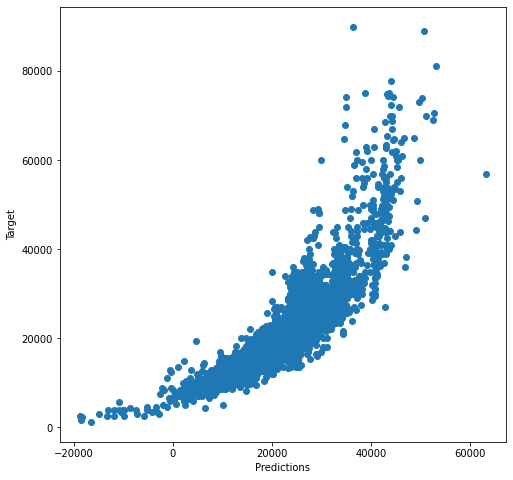

In [20]:
plt.figure(figsize=(8, 8))
plt.scatter(prediction, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')